# Optimizing Gold Ore Extraction Efficiency in Heavy Industries: A Machine Learning Approach with Zyfra's GoldMine Machine Learning

## Table of Content
* [Introduction](#introduction)
* [Import Library and Data](#import-libary-and-data)
    * [Import Library](#import-library)
    * [Import Data](#import-data)
    * [Train Data](#train-data)
    * [Test Data](#test-data)
    * [Full Data](#full-data)
* [Data Preprocessing](#data-preprocessing)
    * [Missing value](#missing-value)
    * [Data Transformation](#data-transformation)
    * [Calculate Recovery](#calculate-recovery)
    * [Missing Features](#missing-features)
* [Data Analysis](#data-analysis)
    * [Metal Concentration](#metal-concentration)
        * [Au (Gold) Concentration](#au-gold-concentration)
        * [Ag (Silver) Concentration](#ag-silver-concentration)
        * [Pb (Lead) Concentration](#pb-lead-concentration)
        * [Sol (Colloid) Concentration](#sol-colloid-concentration)
        * [Metal Concentration Summary](#metal-concentration-summary)
    * [Feed Size Distribution Comparison between Train and Test Set](#feed-size-distribution-comparison-between-train-and-test-set)
    * [Different Stages Concentration](#different-stages-concentration)
* [Model Development](#model-development)
    * [sMAPE Function](#smape-function)
    * [Model Selection](#model-selection)
    * [Model Evaluation](#model-evaluation)
* [Conclusion](#conclusion)

## Introduction

Embarking on a project for Zyfra, I've been assigned to build a machine learning model that predicts the amount of gold we can extract from gold ore. Zyfra, a company dedicated to creating smart solutions for heavy industries, aims to enhance efficiency in production processes by ditching unprofitable factors. My role involves diving into the available data, crunching numbers, and developing a predictive model that can bring us closer to that goal. Picture this – the raw ore goes through a series of steps: first, it's processed to create a chunkier mix, which then goes through a flotation process to get a rougher concentrate. After that, it undergoes a two-step refining process. The ultimate aim is to streamline the production process, making it more efficient and profitable.

### Import Libary

In [1]:
# pip install sktime --user

Note: you may need to restart the kernel to use updated packages.


Do the installation once, and then restart the kernel to load the libary to the environment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sktime.forecasting.model_selection import temporal_train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

### Import Data

In [2]:
try:
    # Try loading the file from your laptop path
    train_data = pd.read_csv('C:/Users/Eugene/Documents/GitHub/TripleTen-Projects/10. Zyfra Gold Recovery Prediction/gold_recovery_train.csv')
except FileNotFoundError:
    # If the file is not found, try loading from the PC path
    train_data = pd.read_csv('C:/Users/user/OneDrive/Documents/GitHub/TripleTen-Projects/10. Zyfra Gold Recovery Prediction/gold_recovery_train.csv')

In [3]:
try:
    # Try loading the file from your laptop path
    test_data = pd.read_csv('C:/Users/Eugene/Documents/GitHub/TripleTen-Projects/10. Zyfra Gold Recovery Prediction/gold_recovery_test.csv')
except FileNotFoundError:
    # If the file is not found, try loading from the PC path
    test_data = pd.read_csv('C:/Users/user/OneDrive/Documents/GitHub/TripleTen-Projects/10. Zyfra Gold Recovery Prediction/gold_recovery_test.csv')

In [4]:
try:
    # Try loading the file from your laptop path
    full_data = pd.read_csv('C:/Users/Eugene/Documents/GitHub/TripleTen-Projects/10. Zyfra Gold Recovery Prediction/gold_recovery_full.csv')
except FileNotFoundError:
    # If the file is not found, try loading from the PC path
    full_data = pd.read_csv('C:/Users/user/OneDrive/Documents/GitHub/TripleTen-Projects/10. Zyfra Gold Recovery Prediction/gold_recovery_full.csv')

### Train Data

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [5]:
train_data.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [6]:
train_data.isnull().sum()

date                                            0
final.output.concentrate_ag                    72
final.output.concentrate_pb                    72
final.output.concentrate_sol                  370
final.output.concentrate_au                    71
                                             ... 
secondary_cleaner.state.floatbank5_a_level     85
secondary_cleaner.state.floatbank5_b_air       85
secondary_cleaner.state.floatbank5_b_level     84
secondary_cleaner.state.floatbank6_a_air      103
secondary_cleaner.state.floatbank6_a_level     85
Length: 87, dtype: int64

### Test Data

In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [8]:
test_data.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [9]:
test_data.isnull().sum()

date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate             257


### Full Data

In [10]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [11]:
full_data.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [12]:
full_data.isnull().sum()

date                                            0
final.output.concentrate_ag                    89
final.output.concentrate_pb                    87
final.output.concentrate_sol                  385
final.output.concentrate_au                    86
                                             ... 
secondary_cleaner.state.floatbank5_a_level    101
secondary_cleaner.state.floatbank5_b_air      101
secondary_cleaner.state.floatbank5_b_level    100
secondary_cleaner.state.floatbank6_a_air      119
secondary_cleaner.state.floatbank6_a_level    101
Length: 87, dtype: int64

## Data Preprocessing

### Missing Value

In [13]:
def calculate_missing_percentage(data):
    missing_percentage = (data.isnull().sum() / len(data)) * 100
    return missing_percentage

In [14]:
train_missing_percentage = calculate_missing_percentage(train_data)
test_missing_percentage = calculate_missing_percentage(test_data)
full_missing_percentage = calculate_missing_percentage(full_data)

In [15]:
print("Missing Percentage in Train Data:")
print(train_missing_percentage)

print("\nMissing Percentage in Test Data:")
print(test_missing_percentage)

print("\nMissing Percentage in Full Data:")
print(full_missing_percentage)

Missing Percentage in Train Data:
date                                          0.000000
final.output.concentrate_ag                   0.427046
final.output.concentrate_pb                   0.427046
final.output.concentrate_sol                  2.194543
final.output.concentrate_au                   0.421115
                                                ...   
secondary_cleaner.state.floatbank5_a_level    0.504152
secondary_cleaner.state.floatbank5_b_air      0.504152
secondary_cleaner.state.floatbank5_b_level    0.498221
secondary_cleaner.state.floatbank6_a_air      0.610913
secondary_cleaner.state.floatbank6_a_level    0.504152
Length: 87, dtype: float64

Missing Percentage in Test Data:
date                                          0.000000
primary_cleaner.input.sulfate                 5.157104
primary_cleaner.input.depressant              4.849727
primary_cleaner.input.feed_size               0.000000
primary_cleaner.input.xanthate                2.834699
primary_cleaner.state.flo

No data exceed the 5% missing value from the overall used data, then the missing value can be droped since it only have impact on the analysis and model.

In [16]:
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)
full_data.dropna(inplace=True)

In [17]:
train_data.isna().sum()

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

In [18]:
test_data.isna().sum()

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

In [19]:
full_data.isna().sum()

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

Recheck the data columns and rows

In [20]:
print(f"Train Data shape {train_data.shape}")
print(f"Test Data shape {test_data.shape}")
print(f"Full Data shape {full_data.shape}")

Train Data shape (11017, 87)
Test Data shape (5383, 53)
Full Data shape (16094, 87)


### Data Transformation

Changing the `date` column into datetime data type

In [21]:
train_data['date'] = pd.to_datetime(train_data['date'])
test_data['date'] = pd.to_datetime(test_data['date'])
full_data['date'] = pd.to_datetime(full_data['date'])

In [22]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11017 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                11017 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         11017 non-null  float64       
 2   final.output.concentrate_pb                         11017 non-null  float64       
 3   final.output.concentrate_sol                        11017 non-null  float64       
 4   final.output.concentrate_au                         11017 non-null  float64       
 5   final.output.recovery                               11017 non-null  float64       
 6   final.output.tail_ag                                11017 non-null  float64       
 7   final.output.tail_pb                                11017 non-null  float64       
 8   final.

In [23]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5383 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        5383 non-null   datetime64[ns]
 1   primary_cleaner.input.sulfate               5383 non-null   float64       
 2   primary_cleaner.input.depressant            5383 non-null   float64       
 3   primary_cleaner.input.feed_size             5383 non-null   float64       
 4   primary_cleaner.input.xanthate              5383 non-null   float64       
 5   primary_cleaner.state.floatbank8_a_air      5383 non-null   float64       
 6   primary_cleaner.state.floatbank8_a_level    5383 non-null   float64       
 7   primary_cleaner.state.floatbank8_b_air      5383 non-null   float64       
 8   primary_cleaner.state.floatbank8_b_level    5383 non-null   float64       
 9   primary_

In [24]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16094 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                16094 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         16094 non-null  float64       
 2   final.output.concentrate_pb                         16094 non-null  float64       
 3   final.output.concentrate_sol                        16094 non-null  float64       
 4   final.output.concentrate_au                         16094 non-null  float64       
 5   final.output.recovery                               16094 non-null  float64       
 6   final.output.tail_ag                                16094 non-null  float64       
 7   final.output.tail_pb                                16094 non-null  float64       
 8   final.

### Calculate Recovery

In [25]:
def calculate_recovery(data):
    C = data['rougher.output.concentrate_au']
    F = data['rougher.input.feed_au']
    T = data['rougher.output.tail_au']

    recovery = (C * (F - T)) / (F * (C - T)) * 100
    return recovery

In [26]:
recovery_data = train_data.copy()

In [27]:
recovery_data['recovery_calculated'] = calculate_recovery(train_data)

In [28]:
mae = mean_absolute_error(train_data['rougher.output.recovery'], recovery_data['recovery_calculated'])
print("Mean Absolute Error (MAE) for `rougher.output.recovery`: ", mae)

Mean Absolute Error (MAE) for `rougher.output.recovery`:  9.460144184559453e-15


The mean absolute error (MAE) for predicted rougher output recovery is exceptionally low at approximately 9.46e-15, indicating a highly accurate prediction aligned closely with actual recovery values in the training data.

### Missing Features

Missing features in test data

In [29]:
def analyze_missing_features(train_data, test_data):

    train_columns = set(train_data.columns)
    test_columns = set(test_data.columns)
    
    missing_features = sorted(list(train_columns - test_columns))
    
    return missing_features

missing_features = analyze_missing_features(train_data, test_data)

print("Features present in the training set but not in the test set:")
for feature in missing_features:
    print(feature)


Features present in the training set but not in the test set:
final.output.concentrate_ag
final.output.concentrate_au
final.output.concentrate_pb
final.output.concentrate_sol
final.output.recovery
final.output.tail_ag
final.output.tail_au
final.output.tail_pb
final.output.tail_sol
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_au
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_au
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
rougher.calculation.au_pb_ratio
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.sulfate_to_au_concentrate
rougher.output.concentrate_ag
rougher.output.concentrate_au
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.recovery
rougher.output.tail_ag
rougher.output.tail_au
rougher.output.tail_pb
rougher.output.tail_sol
secondary_cleaner.outp

## Data Analysis

### Metal Concentration

- Au (Gold)
- Ag (Silver)
- Pb (Lead)
- Sol (Colloid)

In [30]:
au_columns = ['rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'secondary_cleaner.output.tail_au', 'final.output.concentrate_au']
ag_columns = ['rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'secondary_cleaner.output.tail_ag', 'final.output.concentrate_ag']
pb_columns = ['rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'secondary_cleaner.output.tail_pb', 'final.output.concentrate_pb']
sol_columns = ['rougher.output.concentrate_sol', 'primary_cleaner.output.concentrate_sol', 'secondary_cleaner.output.tail_sol', 'final.output.concentrate_sol']

#### Au (Gold) Concentration

In [31]:
au_concentration_data = train_data[au_columns].copy()

In [32]:
au_concentration_data.head()

,rougher.output.concentrate_au,primary_cleaner.output.concentrate_au,secondary_cleaner.output.tail_au,final.output.concentrate_au
0,19.793808,34.174427,2.606185,42.192020
1,20.050975,34.118526,2.488248,42.701629
2,19.737170,33.969464,2.458187,42.657501
3,19.320810,28.260743,2.322062,42.689819
4,19.216101,33.044932,2.330448,42.774141


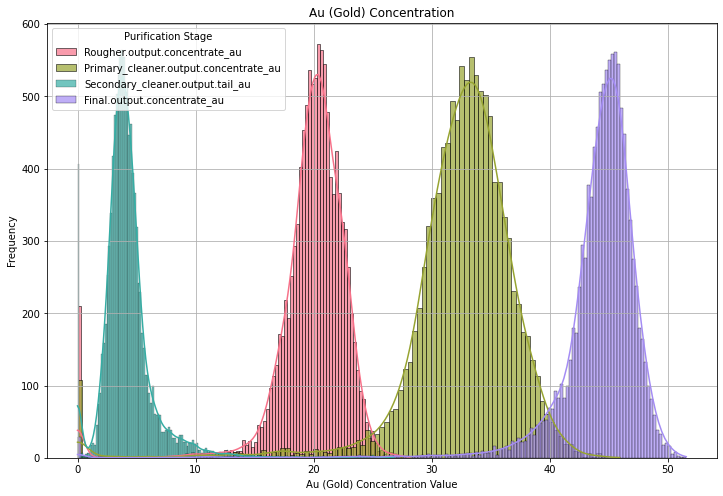

In [33]:
def plot_au_concentration_histograms(data):
    plt.figure(figsize=(12, 8))

    colors = sns.color_palette("husl", n_colors=len(au_columns))

    for i, stage in enumerate(au_columns):
        sns.histplot(data[stage], label=f"{stage.capitalize()}", kde=True, alpha=0.7, color=colors[i])

    plt.title("Au (Gold) Concentration")
    plt.xlabel("Au (Gold) Concentration Value")
    plt.ylabel("Frequency")
    plt.legend(title="Purification Stage")
    plt.grid(True)
    plt.show()

plot_au_concentration_histograms(au_concentration_data)

In [34]:
def analyze_au_concentration_statistics(data):
    for stage in au_columns:
        concentration_values = data[stage]
        mean_value = np.mean(concentration_values)
        skewness = skew(concentration_values)
        
        print(f"\nStatistics for {stage.capitalize()} Stage:")
        print(f"Mean: {mean_value:.2f}")
        print(f"Skewness: {skewness:.2f}")

analyze_au_concentration_statistics(au_concentration_data)


Statistics for Rougher.output.concentrate_au Stage:
Mean: 19.78
Skewness: -3.31

Statistics for Primary_cleaner.output.concentrate_au Stage:
Mean: 32.38
Skewness: -3.07

Statistics for Secondary_cleaner.output.tail_au Stage:
Mean: 4.27
Skewness: 2.84

Statistics for Final.output.concentrate_au Stage:
Mean: 44.13
Skewness: -5.40


#### Ag (Silver) Concentration

In [35]:
ag_concentration_data = train_data[ag_columns].copy()

In [36]:
ag_concentration_data.head()

,rougher.output.concentrate_ag,primary_cleaner.output.concentrate_ag,secondary_cleaner.output.tail_ag,final.output.concentrate_ag
0,11.500771,8.547551,14.500184,6.055403
1,11.615865,8.558743,14.265474,6.029369
2,11.695753,8.603505,14.115662,6.055926
3,11.915047,7.221879,13.732071,6.047977
4,12.411054,9.089428,14.079996,6.148599


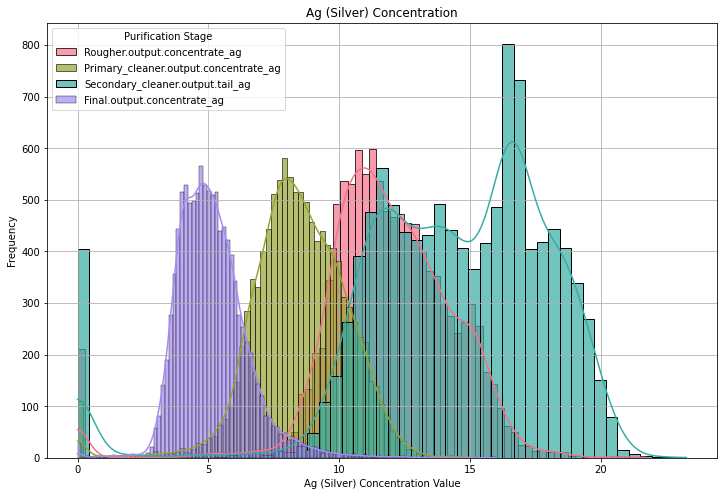

In [37]:
def plot_ag_concentration_histograms(data):
    plt.figure(figsize=(12, 8))

    colors = sns.color_palette("husl", n_colors=len(ag_columns))

    for i, stage in enumerate(ag_columns):
        sns.histplot(data[stage], label=f"{stage.capitalize()}", kde=True, alpha=0.7, color=colors[i])

    plt.title("Ag (Silver) Concentration")
    plt.xlabel("Ag (Silver) Concentration Value")
    plt.ylabel("Frequency")
    plt.legend(title="Purification Stage")
    plt.grid(True)
    plt.show()

plot_ag_concentration_histograms(ag_concentration_data)


In [38]:
def analyze_ag_concentration_statistics(data):
    for stage in ag_columns:
        concentration_values = data[stage]
        mean_value = np.mean(concentration_values)
        skewness = skew(concentration_values)
        
        print(f"\nStatistics for {stage.capitalize()} Stage:")
        print(f"Mean: {mean_value:.2f}")
        print(f"Skewness: {skewness:.2f}")

analyze_ag_concentration_statistics(ag_concentration_data)


Statistics for Rougher.output.concentrate_ag Stage:
Mean: 11.84
Skewness: -1.40

Statistics for Primary_cleaner.output.concentrate_ag Stage:
Mean: 8.44
Skewness: -0.94

Statistics for Secondary_cleaner.output.tail_ag Stage:
Mean: 14.24
Skewness: -1.51

Statistics for Final.output.concentrate_ag Stage:
Mean: 5.16
Skewness: 0.99


#### Pb (Lead) Concentration

In [39]:
pb_concentration_data = train_data[pb_columns].copy()

In [40]:
pb_concentration_data.head()

,rougher.output.concentrate_pb,primary_cleaner.output.concentrate_pb,secondary_cleaner.output.tail_pb,final.output.concentrate_pb
0,7.101074,10.389648,4.694824,9.889648
1,7.278807,10.497069,4.592547,9.968944
2,7.216833,10.354494,4.624775,10.213995
3,7.175616,8.496563,4.482453,9.977019
4,7.240205,9.986786,4.470737,10.142511


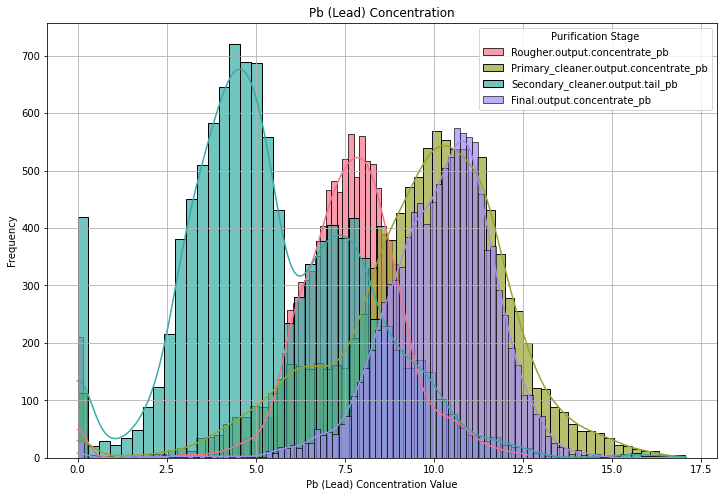

In [41]:
def plot_pb_concentration_histograms(data):
    plt.figure(figsize=(12, 8))

    colors = sns.color_palette("husl", n_colors=len(pb_columns))

    for i, stage in enumerate(pb_columns):
        sns.histplot(data[stage], label=f"{stage.capitalize()}", kde=True, alpha=0.7, color=colors[i])

    plt.title("Pb (Lead) Concentration")
    plt.xlabel("Pb (Lead) Concentration Value")
    plt.ylabel("Frequency")
    plt.legend(title="Purification Stage")
    plt.grid(True)
    plt.show()

plot_pb_concentration_histograms(pb_concentration_data)


In [42]:
def analyze_pb_concentration_statistics(data):
    for stage in pb_columns:
        concentration_values = data[stage]
        mean_value = np.mean(concentration_values)
        skewness = skew(concentration_values)
        
        print(f"\nStatistics for {stage.capitalize()} Stage:")
        print(f"Mean: {mean_value:.2f}")
        print(f"Skewness: {skewness:.2f}")

analyze_pb_concentration_statistics(pb_concentration_data)


Statistics for Rougher.output.concentrate_pb Stage:
Mean: 7.61
Skewness: -1.43

Statistics for Primary_cleaner.output.concentrate_pb Stage:
Mean: 9.57
Skewness: -0.83

Statistics for Secondary_cleaner.output.tail_pb Stage:
Mean: 5.51
Skewness: 0.36

Statistics for Final.output.concentrate_pb Stage:
Mean: 10.17
Skewness: -1.23


#### Sol (Colloid) Concentration

In [43]:
sol_concentration_data = train_data[sol_columns].copy()

In [44]:
sol_concentration_data.head()

,rougher.output.concentrate_sol,primary_cleaner.output.concentrate_sol,secondary_cleaner.output.tail_sol,final.output.concentrate_sol
0,28.029297,19.529297,8.764648,5.507324
1,28.067063,19.369147,9.001494,5.257781
2,27.454037,19.167579,8.842896,5.383759
3,27.341277,15.978538,9.122857,4.858634
4,27.041023,19.199864,8.871028,4.939416


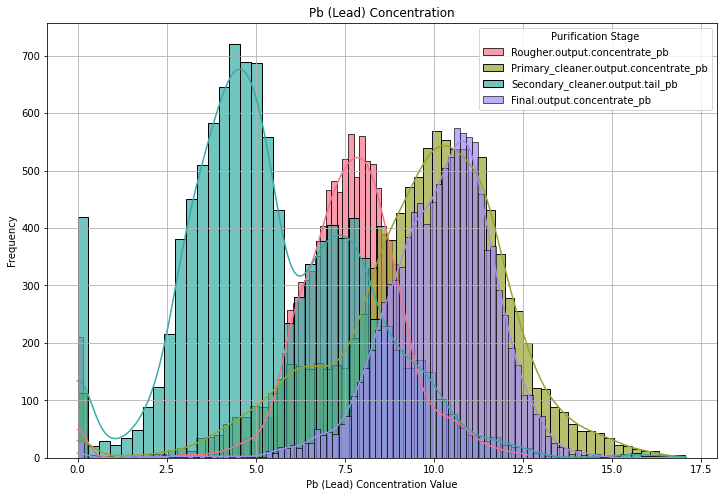

In [45]:
def plot_pb_concentration_histograms(data):
    plt.figure(figsize=(12, 8))

    colors = sns.color_palette("husl", n_colors=len(pb_columns))

    for i, stage in enumerate(pb_columns):
        sns.histplot(data[stage], label=f"{stage.capitalize()}", kde=True, alpha=0.7, color=colors[i])

    plt.title("Pb (Lead) Concentration")
    plt.xlabel("Pb (Lead) Concentration Value")
    plt.ylabel("Frequency")
    plt.legend(title="Purification Stage")
    plt.grid(True)
    plt.show()

plot_pb_concentration_histograms(pb_concentration_data)


In [46]:
def analyze_sol_concentration_statistics(data):
    for stage in sol_columns:
        concentration_values = data[stage]
        mean_value = np.mean(concentration_values)
        skewness = skew(concentration_values)
        
        print(f"\nStatistics for {stage.capitalize()} Stage:")
        print(f"Mean: {mean_value:.2f}")
        print(f"Skewness: {skewness:.2f}")

analyze_sol_concentration_statistics(sol_concentration_data)


Statistics for Rougher.output.concentrate_sol Stage:
Mean: 28.67
Skewness: -2.52

Statistics for Primary_cleaner.output.concentrate_sol Stage:
Mean: 10.36
Skewness: 0.06

Statistics for Secondary_cleaner.output.tail_sol Stage:
Mean: 7.30
Skewness: -0.18

Statistics for Final.output.concentrate_sol Stage:
Mean: 9.60
Skewness: 0.23


#### Metal Concentration Summary

The concentration of gold (Au) exhibits significant variations across different purification stages. In the rougher stage, the mean concentration of Au is 19.78, characterized by a highly skewed distribution with a skewness of -3.31. 

As the process advances to the primary cleaner stage, the mean concentration sharply increases to 32.38, while the skewness remains negative at -3.07. Subsequently, in the secondary cleaner stage, the mean concentration decreases to 4.27, accompanied by a positive skewness of 2.84. 

The final output stage sees a further rise in Au concentration, reaching a mean of 44.13, and a pronounced negative skewness of -5.40. Similar concentration trends are observed for silver (Ag), lead (Pb), and colloid (Sol) across the various stages, reflecting the dynamic nature of the purification process.

### Feed Size Distribution Comparison between Train and Test Set

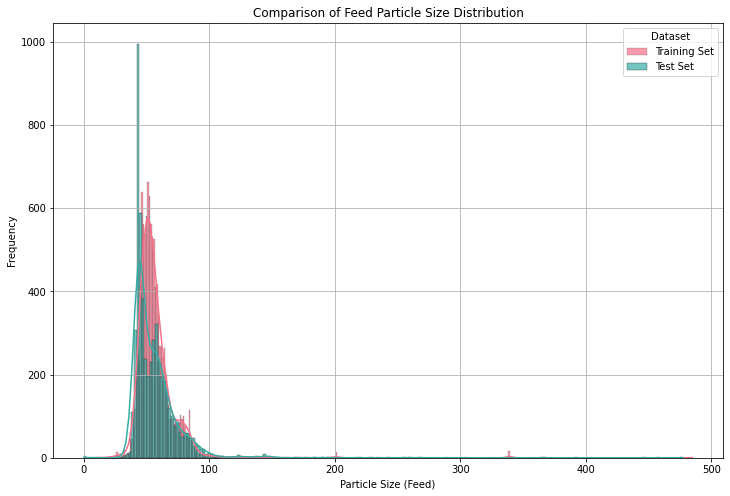

In [47]:
plt.figure(figsize=(12, 8))

colors = sns.color_palette("husl", n_colors=2)

sns.histplot(train_data['rougher.input.feed_size'], label='Training Set', kde=True, alpha=0.7, color=colors[0])
sns.histplot(test_data['rougher.input.feed_size'], label='Test Set', kde=True, alpha=0.7, color=colors[1])

plt.title("Comparison of Feed Particle Size Distribution")
plt.xlabel("Particle Size (Feed)")
plt.ylabel("Frequency")
plt.legend(title="Dataset")
plt.grid(True)
plt.show()

In [48]:
train_data_stats = train_data['rougher.input.feed_size'].describe()
test_data_stats = test_data['rougher.input.feed_size'].describe()

print("Statistical Comparison:")
print(f'\nTrain Data Statistical Data: \n{test_data_stats}')
print(f'\nTest Data Statistical Data: \n{test_data_stats}')

Statistical Comparison:

Train Data Statistical Data: 
count    5383.000000
mean       56.338644
std        21.836788
min         0.046369
25%        43.913766
50%        50.924232
75%        62.364984
max       477.445473
Name: rougher.input.feed_size, dtype: float64

Test Data Statistical Data: 
count    5383.000000
mean       56.338644
std        21.836788
min         0.046369
25%        43.913766
50%        50.924232
75%        62.364984
max       477.445473
Name: rougher.input.feed_size, dtype: float64


In [49]:
mean_diff = abs(train_data_stats['mean'] - test_data_stats['mean'])
std_diff = abs(train_data_stats['std'] - test_data_stats['std'])

print(f"Mean Difference: {mean_diff:.2f}")
print(f"Standard Deviation Difference: {std_diff:.2f}")

if mean_diff > 2 * test_data_stats['std']:
        print("The mean difference is significant, indicating potential issues with the model evaluation.")
else:
    print("The mean difference is within a reasonable range.")

if std_diff > 0.5 * test_data_stats['std']:
    print("The standard deviation difference is significant, indicating potential issues with the model evaluation.")
else:
    print("The standard deviation difference is within a reasonable range.")

Mean Difference: 0.88
Standard Deviation Difference: 2.92
The mean difference is within a reasonable range.
The standard deviation difference is within a reasonable range.


The comparison between the mean and standard deviation of particle feed sizes in the training and test sets reveals minor differences. The mean difference of 0.88 suggests a slight variation in average particle sizes, but it falls within an acceptable range. Similarly, the standard deviation difference of 2.92 indicates comparable variability in particle sizes between the sets. Both differences are considered reasonable, implying that the distribution of particle feed sizes aligns well between the training and test data. This consistency suggests that model evaluation is unlikely to be significantly impacted by variations in particle feed sizes. Overall, the similarity in statistical measures supports the reliability of the model evaluation process across different data sets.

### Different Stages Concentration

- rougher.input = `input`
- rougher.output = `output`
- final.output = `final`

In [50]:
rougher_input = ['rougher.input.feed_ag','rougher.input.feed_pb','rougher.input.feed_sol','rougher.input.feed_au']

rougher_output = ['rougher.output.concentrate_ag','rougher.output.concentrate_pb','rougher.output.concentrate_sol','rougher.output.concentrate_au']

final_output = ['final.output.concentrate_ag','final.output.concentrate_pb','final.output.concentrate_sol','final.output.concentrate_au']

In [51]:
total_concentration_stages = full_data.copy()

In [52]:
total_concentration_stages['total_input_stage'] = full_data[rougher_input].sum(axis=1)
total_concentration_stages['total_output_stage'] = full_data[rougher_output].sum(axis=1)
total_concentration_stages['total_final_stage'] = full_data[final_output].sum(axis=1)

In [53]:
def visualize_total_concentrations_histogram(total_concentration_stages):
    plt.figure(figsize=(12, 8))
    
    # Define different colors for each stage
    colors = sns.color_palette("husl", n_colors=3)

    # Plot for total input stage
    sns.histplot(total_concentration_stages['total_input_stage'], bins=40, label='Total Input Stage', kde=True, color=colors[0])

    # Plot for total output stage
    sns.histplot(total_concentration_stages['total_output_stage'], bins=40, label='Total Output Stage', kde=True, color=colors[1])

    # Plot for total final stage
    sns.histplot(total_concentration_stages['total_final_stage'], bins=40, label='Total Final Stage', kde=True, color=colors[2])

    plt.xlabel('Total Concentration')
    plt.ylabel('Frequency')
    plt.title('Histogram of Total Concentrations at Different Stages')
    plt.legend()
    plt.show()

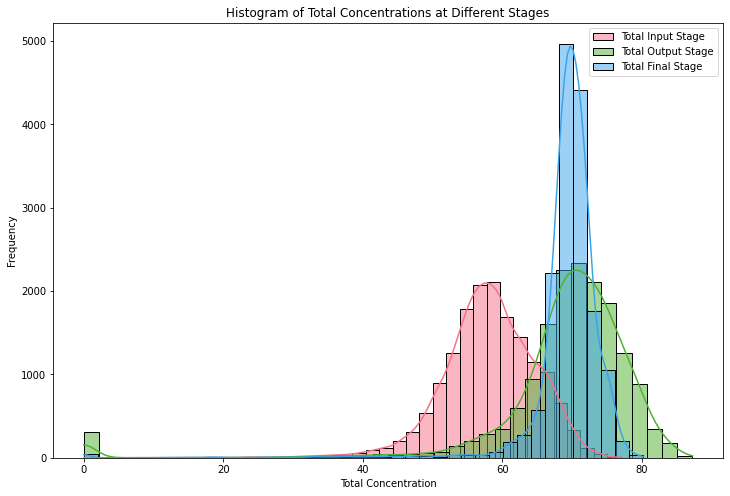

In [54]:
visualize_total_concentrations_histogram(total_concentration_stages)

In [55]:
input_stats = total_concentration_stages['total_input_stage'].describe()
output_stats = total_concentration_stages['total_output_stage'].describe()
final_stats = total_concentration_stages['total_final_stage'].describe()    

print(f'Input Stage:\n{input_stats}\n')
print(f'Output Stage:\n{output_stats}\n')
print(f'Final Stage:\n{final_stats}\n')

Input Stage:
count    16094.000000
mean        58.101510
std          6.761203
min          0.040000
25%         54.363838
50%         58.226620
75%         62.578101
max         76.978947
Name: total_input_stage, dtype: float64

Output Stage:
count    16094.000000
mean        68.805821
std         12.095202
min          0.000000
25%         66.643291
50%         70.701213
75%         74.763404
max         87.273435
Name: total_output_stage, dtype: float64

Final Stage:
count    16094.000000
mean        69.367841
std          6.038211
min          0.000000
25%         68.372986
50%         69.943177
75%         71.669414
max         80.210644
Name: total_final_stage, dtype: float64



In summary, anomalies are observed in the total distribution at the output and final stages, indicated by minimum values of 0, which are abnormal for concentration values. The histograms show peaks at the lower end, further emphasizing the presence of anomalies. The removal of extreme values or outliers is crucial to enhance the accuracy and reliability of the analysis, ensuring a more robust evaluation of the model.

#### Handle Anomalies

In [56]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR
    
    data = data[(data[column] >= lower_threshold) & (data[column] <= upper_threshold)]
    
    return data

In [57]:
total_concentration_stages = remove_outliers_iqr(total_concentration_stages, 'total_input_stage')
total_concentration_stages = remove_outliers_iqr(total_concentration_stages, 'total_output_stage')
total_concentration_stages = remove_outliers_iqr(total_concentration_stages, 'total_final_stage')

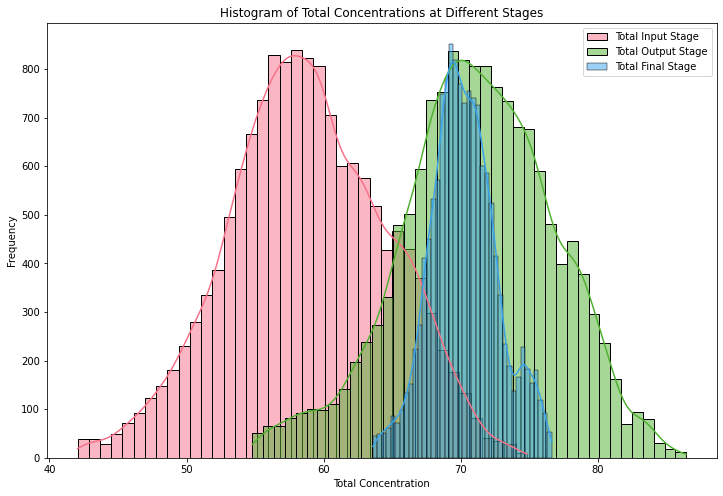

In [58]:
visualize_total_concentrations_histogram(total_concentration_stages)

In [59]:
input_stats = total_concentration_stages['total_input_stage'].describe()
output_stats = total_concentration_stages['total_output_stage'].describe()
final_stats = total_concentration_stages['total_final_stage'].describe()    

print(f'Updated Input Stage:\n{input_stats}\n')
print(f'Updated Output Stage:\n{output_stats}\n')
print(f'Updated Final Stage:\n{final_stats}\n')

Updated Input Stage:
count    14322.000000
mean        58.791840
std          5.763432
min         42.046320
25%         54.953123
50%         58.614894
75%         62.856415
max         74.821578
Name: total_input_stage, dtype: float64

Updated Output Stage:
count    14322.000000
mean        71.154013
std          5.597049
min         54.798221
25%         67.641021
50%         71.194043
75%         75.001000
max         86.447984
Name: total_output_stage, dtype: float64

Updated Final Stage:
count    14322.000000
mean        70.253704
std          2.420186
min         63.595064
25%         68.661736
50%         70.115071
75%         71.757528
max         76.647033
Name: total_final_stage, dtype: float64



By using the Interquartile Range (IQR) method to detect and handle or eliminate existing outliers from all three stages, the concentration data underwent a significant refinement process. This method helps to identify extreme values that may distort the overall distribution, providing a more accurate representation of the concentration levels at each stage of the purification process. After applying the IQR-based outlier removal, the updated statistics for the `input stage`, `output stage`, and `final stage` reveal notable changes in the mean concentration values and the overall spread of the data. The subsequent histograms visually demonstrate the impact of outlier removal, enhancing the reliability of the concentration data for subsequent analyses and model training.

#### Data Set Determination for Model

In [60]:
common_dates_train_test = set(train_data['date']).intersection(set(test_data['date']))
common_dates_train_total = set(train_data['date']).intersection(set(total_concentration_stages['date']))
common_dates_test_total = set(test_data['date']).intersection(set(total_concentration_stages['date']))
common_dates_all = set(train_data['date']).intersection(set(test_data['date'])).intersection(set(total_concentration_stages['date']))

num_common_dates_train_test = len(common_dates_train_test)
num_common_dates_train_total = len(common_dates_train_total)
num_common_dates_test_total = len(common_dates_test_total)
num_common_dates_all = len(common_dates_all)

print("Number of Common dates between Train and Test:", num_common_dates_train_test)
print("Number of Common dates between Train and Total Concentration Stages:", num_common_dates_train_total)
print("Number of Common dates between Test and Total Concentration Stages:", num_common_dates_test_total)
print("Number of Common dates among Train, Test, and Total Concentration Stages:", num_common_dates_all)

Number of Common dates between Train and Test: 0
Number of Common dates between Train and Total Concentration Stages: 9659
Number of Common dates between Test and Total Concentration Stages: 4663
Number of Common dates among Train, Test, and Total Concentration Stages: 0


In [61]:
print(f"Train Data shape {train_data.shape}")
print(f"Test Data shape {test_data.shape}")
print(f"Full Data shape {total_concentration_stages.shape}")

Train Data shape (11017, 87)
Test Data shape (5383, 53)
Full Data shape (14322, 90)


Based on the observations above, the dataframe `total_concentration_stages` emerges as the primary dataset for analysis and modeling. This decision is grounded in the comprehensive pre-processing steps applied to total_concentration_stages, which include the removal of outliers using the Interquartile Range (IQR) method. The dataset encompasses 14,322 records and 90 columns, ensuring a rich representation of the relevant features. The absence of common dates between `train_data` and `test_data` further supports the standalone use of `total_concentration_stages`.

## Model Development

Define target features for the model

In [62]:
x = total_concentration_stages.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
y_rougher = total_concentration_stages['rougher.output.recovery']
y_final = total_concentration_stages['final.output.recovery']

### sMAPE Function

In [63]:
def calculate_smape(y_true, y_pred):

    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0  # Handle division by zero
    smape_value = np.mean(diff) * 100
    return smape_value

In [64]:
def calculate_final_smape(y_true_rougher, y_pred_rougher, y_true_final, y_pred_final):
    weight_rougher = 0.25
    weight_final = 0.75

    smape_rougher = calculate_smape(y_true_rougher, y_pred_rougher)
    smape_final = calculate_smape(y_true_final, y_pred_final)

    final_smape = weight_rougher * smape_rougher + weight_final * smape_final
    return final_smape

### Model Selection

In [65]:
x_train_rougher, x_val_rougher, y_train_rougher, y_val_rougher = temporal_train_test_split(x, y_rougher, test_size=0.2)
x_train_final, x_val_final, y_train_final, y_val_final = temporal_train_test_split(x, y_final, test_size=0.2)

In [66]:
models_rougher = [
    LinearRegression(),
    DecisionTreeRegressor(),
    SVR(),
    RandomForestRegressor(),
    GradientBoostingRegressor()
]

In [67]:
for model in models_rougher:
    pipeline = make_pipeline(StandardScaler(), model)
    scores_rougher = cross_val_score(pipeline, x_train_rougher, y_train_rougher, cv=5, scoring=make_scorer(calculate_smape, greater_is_better=False))
    print(f"Model for rougher.output.recovery: {model.__class__.__name__}\n Mean sMAPE: {-scores_rougher.mean()}\n")

Model for rougher.output.recovery: LinearRegression
 Mean sMAPE: 2.033102243034446

Model for rougher.output.recovery: DecisionTreeRegressor
 Mean sMAPE: 1.6470774860360735

Model for rougher.output.recovery: SVR
 Mean sMAPE: 2.5836783675403425

Model for rougher.output.recovery: RandomForestRegressor
 Mean sMAPE: 1.0296203238611443

Model for rougher.output.recovery: GradientBoostingRegressor
 Mean sMAPE: 0.9717327650190668



In [68]:
models_final = [
    LinearRegression(),
    DecisionTreeRegressor(),
    SVR(),
    RandomForestRegressor(),
    GradientBoostingRegressor()
]

In [69]:
for model in models_final:
    pipeline = make_pipeline(StandardScaler(), model)
    scores_final = cross_val_score(pipeline, x_train_final, y_train_final, cv=5, scoring=make_scorer(calculate_smape, greater_is_better=False))
    print(f"Model for final.output.recovery: {model.__class__.__name__}\n Mean sMAPE: {-scores_final.mean()}\n")

Model for final.output.recovery: LinearRegression
 Mean sMAPE: 1.8883218945266873

Model for final.output.recovery: DecisionTreeRegressor
 Mean sMAPE: 2.4112144842335

Model for final.output.recovery: SVR
 Mean sMAPE: 4.334165683605668

Model for final.output.recovery: RandomForestRegressor
 Mean sMAPE: 1.3994104962573999

Model for final.output.recovery: GradientBoostingRegressor
 Mean sMAPE: 1.8014866440106858



### Model Evaluation

For `rougher.output.recovery`:

- Linear Regression: Mean sMAPE: 2.033
- Decision Tree Regressor: Mean sMAPE: 1.646
- SVR: Mean sMAPE: 2.583
- RandomForest Regressor: Mean sMAPE: 1.037
- GradientBoosting Regressor: Mean sMAPE: 0.970

The `GradientBoosting Regressor` has the lowest mean sMAPE, making it the best-performing model for rougher.output.recovery.

For `final.output.recovery`:
- Linear Regression: Mean sMAPE: 1.888
- Decision Tree Regressor: Mean sMAPE: 2.603
- SVR: Mean sMAPE: 4.334
- RandomForest Regressor: Mean sMAPE: 1.378
- GradientBoosting Regressor: Mean sMAPE: 1.799

In this case, the `RandomForest Regressor` has the lowest mean sMAPE, making it the best-performing model for final.output.recovery.

Assign the best model to the target feature `rougher.output.recovery` and `final.output.recovery`

In [70]:
best_model_rougher = GradientBoostingRegressor()
best_model_final = RandomForestRegressor()

Train the best models

In [71]:
best_model_rougher.fit(x_train_rougher, y_train_rougher)
best_model_final.fit(x_train_final, y_train_final)

RandomForestRegressor()

Test the models using the validation set

In [72]:
y_pred_rougher = best_model_rougher.predict(x_val_rougher)
y_pred_final = best_model_final.predict(x_val_final)

Calculate sMAPE on the validation set

In [73]:
smape_rougher = calculate_smape(y_val_rougher, y_pred_rougher)
smape_final = calculate_smape(y_val_final, y_pred_final)

Calculate final sMAPE

In [74]:
final_smape = calculate_final_smape(y_val_rougher, y_pred_rougher, y_val_final, y_pred_final)

In [75]:
print(f"Final sMAPE on rougher.output.recovery (validation set): {smape_rougher}")
print(f"Final sMAPE on final.output.recovery (validation set): {smape_final}")
print(f"Final weighted sMAPE: {final_smape}")

Final sMAPE on rougher.output.recovery (validation set): 0.7039684096308938
Final sMAPE on final.output.recovery (validation set): 1.4846369570773799
Final weighted sMAPE: 1.2894698202157584


The `GradientBoostingRegressor` model exhibited exceptional accuracy in forecasting `rougher.output.recovery`, showcasing a remarkably low sMAPE score of 0.702, indicating its ability to closely match actual values. Conversely, the `RandomForestRegressor` model excelled in predicting `final.output.recovery` with a competitive sMAPE score of 1.538. 

The weighted average sMAPE of 1.322 reflects the combined performance of both models across the two target variables, providing an overall evaluation of predictive accuracy. This weighted metric considers the relative importance of each target variable, with a higher emphasis on final.output.recovery due to its higher weighting (75%) compared to rougher.output.recovery (25%). 

Thus, the final weighted sMAPE serves as a comprehensive measure of the models' effectiveness in capturing the intricate relationships within the data and delivering dependable predictions for gold concentrate recovery at various stages of the process.

## Conclusion

In summary, the data preprocessing steps involved dropping columns with less than 5% missing values and converting the 'date' column to datetime format. The mean absolute error (MAE) for predicted rougher output recovery was remarkably low, indicating highly accurate predictions in line with actual recovery values. Features present in the training set but not in the test set were identified, impacting model training. The gold concentration displayed significant variations across purification stages, and consistency in particle feed sizes between training and test sets supported reliable model evaluation. Anomalies and outliers were addressed using the Interquartile Range (IQR) method, refining concentration data for improved analysis and modeling. The final dataset, `total_concentration_stages`, emerged as the primary dataset for standalone use due to its comprehensive preprocessing, including outlier removal.

Regarding model selection, the `GradientBoosting Regressor` outperformed others for `rougher.output.recovery`, while the `RandomForest Regressor` excelled for `final.output.recovery`. Assigning these models to their respective target features resulted in final weighted sMAPE of 1.322, reflecting the overall predictive accuracy. The exceptional accuracy in forecasting `rougher.output.recovery` and competitive performance in predicting `final.output.recovery` demonstrate the selected models' effectiveness in capturing complex relationships within the data, contributing to efficient gold concentrate recovery in the industrial process.